## Performance X human likeness.

----

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set("notebook", font_scale=1.1, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 14

METRICS_HUMAN_LIKE = ['act_acc', 'accel_val_mae', 'steer_val_mae', 'speed_mae', 'pos_rmse']
METRICS_PERFORMANCE = ['goal_rate', 'off_road', 'veh_veh_collision']

### Helper functions

In [2]:
def make_figure(df_agg, hl_metric, fig_name, x_label, palette='colorblind'):
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))

    # Goal rate
    sns.scatterplot(
        data=df_agg,
        x=hl_metric,
        y='goal_rate',
        style='Reg. weight',
        hue='Reg. weight',
        legend=False,
        palette=palette,
        ax=axes[0]
    )

    sns.scatterplot(
        data=df_agg,
        x=hl_metric,
        y='off_road',
        style='Reg. weight',
        hue='Reg. weight',
        legend=False,
        palette=palette,
        ax=axes[1]
    )
    
    sns.scatterplot(
        data=df_agg,
        x=hl_metric,
        y='veh_veh_collision',
        style='Reg. weight',
        hue='Reg. weight',
        legend=True,
        palette=palette,
        ax=axes[2]
    )

    axes[0].grid(True, alpha=.5)
    axes[1].grid(True, alpha=.5)
    axes[2].grid(True, alpha=.5)
    axes[2].legend(
        bbox_to_anchor=(1.05, 1.0), 
        loc="upper left", 
        fontsize=11, 
        labelspacing=0.5
    )

    axes[0].set_ylabel("Goal rate [%]")
    axes[1].set_ylabel("Off-road [%]")
    axes[2].set_ylabel("Collision rate [%]")

    axes[0].set_xlabel(f"{x_label}")
    axes[1].set_xlabel(f"{x_label}")
    axes[2].set_xlabel(f"{x_label}")
    plt.tight_layout()
    
    plt.savefig(f"../evaluation/figures/{fig_name}.pdf", bbox_inches='tight')

### Load trade-off results df

In [25]:
df_res = pd.read_csv("../evaluation/paper/df_trade_off_0131.csv")


df_res

,Reg. weight,traffic_scene,agent_id,act_acc,accel_val_mae,steer_val_mae,pos_rmse,speed_mae,goal_rate,off_road,veh_veh_collision,Agent,Train agent,Dataset,Eval mode
0,0.0,tfrecord-00000-of-00150_101.json,2,0.0125,3.750000,0.000000,0.381181,0.575285,1.0,0.0,0.0,PPO,Self-play,data_full/valid,Self-play
1,0.0,tfrecord-00000-of-00150_101.json,14,0.0125,3.662791,0.446512,9.502719,6.687565,1.0,0.0,0.0,PPO,Self-play,data_full/valid,Self-play
2,0.0,tfrecord-00000-of-00150_101.json,24,0.0000,5.468750,0.562500,3.176317,3.629751,1.0,0.0,0.0,PPO,Self-play,data_full/valid,Self-play
3,0.0,tfrecord-00000-of-00150_101.json,28,0.0000,4.750000,0.240000,0.902328,1.108560,1.0,0.0,0.0,PPO,Self-play,data_full/valid,Self-play
4,0.0,tfrecord-00000-of-00150_101.json,29,0.0000,5.694444,0.200000,1.737885,1.591456,1.0,0.0,0.0,PPO,Self-play,data_full/valid,Self-play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198769,NaN,tfrecord-00061-of-00150_146.json,18,0.2875,1.642857,0.000000,3.704053,0.282060,0.0,0.0,0.0,BC,-,data_full/valid,Self-play
198770,NaN,tfrecord-00061-of-00150_149.json,1,0.1625,1.925000,0.006000,7.519539,3.382720,1.0,0.0,0.0,BC,-,data_full/valid,Self-play
198771,NaN,tfrecord-00061-of-00150_149.json,3,0.2000,1.910714,0.000000,3.613029,0.911939,0.0,0.0,0.0,BC,-,data_full/valid,Self-play
198772,NaN,tfrecord-00061-of-00150_149.json,6,0.1375,3.313492,0.000000,5.040108,1.429209,1.0,0.0,0.0,BC,-,data_full/valid,Self-play


In [3]:
df_res = pd.read_csv("../evaluation/paper/df_trade_off_0131.csv")

mapping = {
    np.nan: "BC",
    0.0: "PPO",
    0.005: "HR-PPO | λ = 0.005",
    0.01: "HR-PPO | λ = 0.01",
    0.025: "HR-PPO | λ = 0.025",
    0.05: "HR-PPO | λ = 0.05",
    0.5: "HR-PPO | λ = 0.5",
    0.2: "HR-PPO | λ = 0.2",
    0.1: "HR-PPO | λ = 0.1",
}

df_res["Reg. weight"] = df_res["Reg. weight"].replace(mapping)

In [4]:
df_res.shape

(198774, 15)

In [5]:
# Create aggregate table
df_agg = df_res.groupby(['Reg. weight'])[METRICS_HUMAN_LIKE + METRICS_PERFORMANCE].mean() 
df_agg["goal_rate"] = df_agg["goal_rate"] * 100
df_agg["off_road"] = df_agg["off_road"] * 100
df_agg["veh_veh_collision"] = df_agg["veh_veh_collision"] * 100
df_agg["act_acc"] = df_agg["act_acc"] * 100

In [6]:
df_agg

,act_acc,accel_val_mae,steer_val_mae,speed_mae,pos_rmse,goal_rate,off_road,veh_veh_collision
Reg. weight,,,,,,,,
BC,7.272443,2.667252,0.138792,65.032377,10.830174,41.951161,14.392224,11.011500
HR-PPO | λ = 0.005,2.125215,4.120786,0.205416,56.820234,9.924409,86.742733,3.432038,9.930876
HR-PPO | λ = 0.01,1.689494,4.585109,0.203057,56.589272,10.100005,90.259289,2.484228,7.654925
HR-PPO | λ = 0.025,2.361828,4.385428,0.169871,58.692764,10.337089,88.424039,3.208669,8.672160
HR-PPO | λ = 0.05,4.763915,3.663670,0.134119,60.748751,10.537427,85.142926,4.995623,8.234477
PPO,1.532872,4.560799,0.232673,56.398807,9.896301,89.163573,2.789097,8.303903


### Is there a trade-off between human likeness and performance? | **Pareto plots**

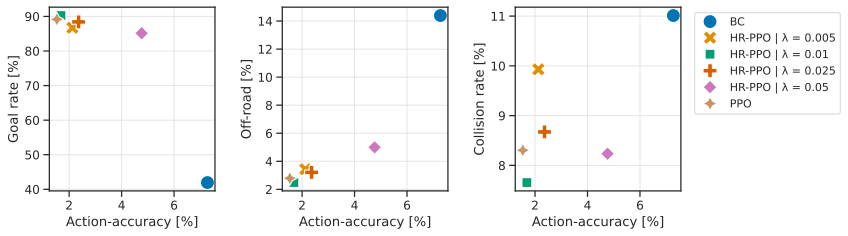

In [38]:
make_figure(df_agg=df_agg, hl_metric='act_acc', x_label='Action-accuracy [%]', fig_name='acc_x_performance')

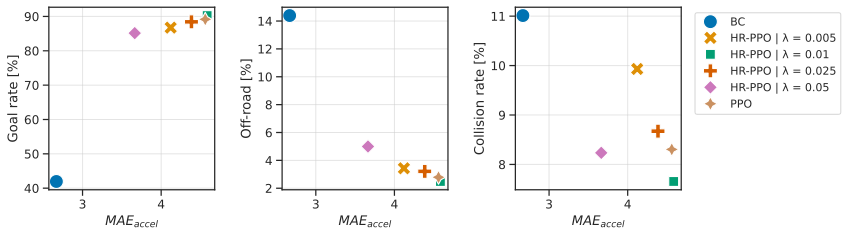

In [39]:
make_figure(df_agg=df_agg, hl_metric='accel_val_mae', x_label=r'$MAE_{accel}$', fig_name='acc_x_mae_accel')

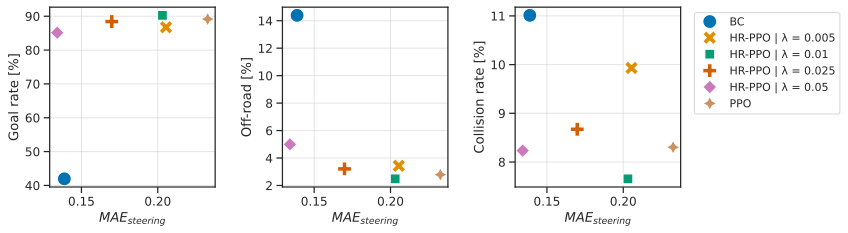

In [40]:
make_figure(df_agg=df_agg, hl_metric='steer_val_mae', x_label=r'$MAE_{steering}$', fig_name='acc_x_mae_steering')